<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study-2:-Language-Processing" data-toc-modified-id="Case-Study-2:-Language-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study 2: Language Processing</a></span><ul class="toc-item"><li><span><a href="#Introduction-to-Language-Processing" data-toc-modified-id="Introduction-to-Language-Processing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction to Language Processing</a></span></li><li><span><a href="#Counting-Words" data-toc-modified-id="Counting-Words-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Counting Words</a></span></li><li><span><a href="#Reading-in-a-Book" data-toc-modified-id="Reading-in-a-Book-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Reading in a Book</a></span></li><li><span><a href="#Computing-Word-Frequency-Statistics" data-toc-modified-id="Computing-Word-Frequency-Statistics-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Computing Word Frequency Statistics</a></span></li><li><span><a href="#Reading-Multiple-Files" data-toc-modified-id="Reading-Multiple-Files-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Reading Multiple Files</a></span><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Pandas</a></span></li></ul></li><li><span><a href="#Plotting-Book-Statistics" data-toc-modified-id="Plotting-Book-Statistics-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plotting Book Statistics</a></span></li></ul></li></ul></div>

## Case Study 2: Language Processing

### Introduction to Language Processing

Patterns within written text are not the same across all authors or languages.

This allows linguists to study the language of origin or potential authorship of texts where these characteristics are not directly known such as the Federalist Papers of the American Revolution.

In this case study, we will examine the properties of individual books in a book collection from various authors and various languages.

More specifically, we will look at book lengths, number of unique words, and how these attributes cluster by language of or authorship.

Project Gutenberg is the oldest digital library of books.

It aims to digitize and archive cultural works, and at present, contains over 50,000 books, all previously published and now available electronically.

We have downloaded a collection of over 100 titles from Project Gutenberg for analysis as a sample library for this case study.

The downloaded sample consist of several nested folders.

At the top level, we have four languages: English, French, German, and Portuguese.

For each language, we have from one to four authors each, 13 authors in total.

For each author, we have from 1 to 16 books, 102 books in total.

Some authors have appeared in several language categories because their books are available as translations in several languages.

Our goal is to write a function that given a string of text counts the number of times each unique word appears.

What's the best way to keep track of these words? Because we'd like to associate each word with a counter, Python dictionaries are a very natural choice.

Here, the keys are strings, the words containing the input text, and the values are numbers that counts indicating how many times each word appears in the text.

### Counting Words

Two problems are:

1. Capitalization of first letter of a word at the beginning of the sentence. It inflates word count as it is treated seperately from the same word in the middle of the sentence - convert text tp lower case for this
1. Punctuation marks like full stop. Words at the end of the sentence are treated different from one's occuring in the middle due to full stop - Addressing punctuation is a bit more complex. Our strategy is to first specify all the punctuation marks that we'd like to skip, and then loop over that container and replace every occurrence of a punctuation mark with an empty string.

In [767]:
text = "This is my test text. We're keeping this text short to keep things manageable."

def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        word_counts[word] = word_counts.get(word,0) + 1
    return word_counts

words_count = count_words(text)
print(words_count)

{'this': 2, 'is': 1, 'my': 1, 'test': 1, 'text': 2, 'were': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1}


counting the frequency of objects is such a common operation that Python provides what is known as a counter tool to support rabbit tallies.

We first need to import it from the collections module, which provides many additional high performance data types.

The object returned by counter behaves much like a dictionary, although strictly speaking it's a subclass of the Python dictionary object.

In [768]:
from collections import Counter

def count_words_fast(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    
    words_count = Counter(text.split(" "))

    return words_count

words_count = count_words_fast(text)
print(words_count)
# print(text)

Counter({'this': 2, 'text': 2, 'is': 1, 'my': 1, 'test': 1, 'were': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1})


Let's see if the objects returned by these two different functions are actually the same.

In [769]:
count_words(text) == count_words_fast(text)

True

we know that these two different implementations of the same function return identical objects.

In [770]:
count_words(text) is count_words_fast(text)

False

While the two provide the same results, they are different objects in memory.

In [771]:
len(count_words("This comprehension check is to check for comprehension."))

6

### Reading in a Book

We're familiar by now with reading files.

But here we'll include an additional argument.

Character encoding refers to the process how computer encodes certain characters.

In this case, we'll use what is called UTF-8 encoding, which is the dominant character encoding for the web.

We will also replace backslash n and backslash r characters.

So with open(title_path) we're opening the file for reading.

And then we need to specify encoding, which in this case is utf8.

In [772]:
pwd

'C:\\Users\\dvije\\Google Drive\\Jupyter Notebooks\\Python Research Libraries'

In [773]:
import os
lst = os.listdir('.')
print(lst)

['.ipynb_checkpoints', '3trj.pdf', 'adj_allVillageRelationships_vilno_1.csv', 'adj_allVillageRelationships_vilno_2.csv', 'bird_tracking.csv', 'bivardata.pdf', 'case studies', 'case_studies', 'correlations.pdf', 'corr_flavors.pdf', 'corr_whisky.pdf', 'daily_mean_speed.png', 'dms.pdf', 'dna.txt', 'EDX- Using Python for Research to html_toc script.bat', 'EDX- Using Python for Research.html', 'EDX- Using Python for Research.ipynb', 'EDX- Using Python for Research.pdf', 'EDX- Using Python for Research_conda.html', 'EDX- Using Python for Research_files', 'EDX- Using Python for Research_i.pdf', 'er1.pdf', 'figures', 'foundations_of_regression_and_classification.png', 'hist.pdf', 'hist1.pdf', 'hist_3.pdf', 'iris.pdf', 'iris_grid.pdf', 'karate_graph.pdf', 'knn_synth_5.pdf', 'knn_synth_50.pdf', 'lang_plot.pdf', 'map.pdf', 'myplot.pdf', 'OLS_estimate_95_percent_slope_confidence_interval_eg.png', 'OLS_estimate_without_slope.png', 'Overfit_and_Underfit.png', 'pd_hist.pdf', 'Plotting the Degree Dist

There's a famous line in Romeo and Juliet.

Let's see if we can find it.

We'll be using the find method.

The line starts, "What's in a name?"

The find method will return the index if it finds the substring.

In [774]:
import pathlib
import os
def read_book(title_path):
    """
    Read a book and return it as a string
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read().replace("\n","").replace("\r","")
    return text

# text = read_book("./case studies/language processing/ Books_EngFr/English/shakespeare/Romeo and Juliet.txt")
# script_path = os.path.dirname('__file__') # it works in python script this is pynb ie terminal so
# script_path = os.getcwd()
# print(script_path + "script")
# print(os.getcwd())
# rel_path = "/case studies/language processing/Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt"
# abs_file_path = os.path.join(script_path,rel_path)
# fpath = pathlib.Path(abs_file_path)
# print(type(fpath))
# print(fpath)

text = read_book(pathlib.Path("./case studies/language processing/Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt"))
print(len(text))

ind = text.find("What's in a name?")
print(f"Index: {ind}")

sample_text = text[ind : ind + 1000]
print(sample_text)

169275
Index: 42757
What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the 

### Computing Word Frequency Statistics

Given a dictionary or a counter object from the collections module, we would like to know how many unique words there are in a given book.

We'd also like to return the frequencies of each word, meaning, count-specifying how many times each word has appeared.



In [775]:
def word_stats(word_counts):
    """
    Return number of unique words and word frequencies.
    """
    num_unique = len(word_counts)
    counts = word_counts.values()

    return (num_unique,counts)

text = read_book(pathlib.Path("./case studies/language processing/Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt"))

word_counts = count_words(text)
(num_unique,counts) = word_stats(word_counts)

print(f"No of unique words: {num_unique}")
print(f"Total no of words: {sum(counts)}")

No of unique words: 5118
Total no of words: 40776


Let's use the word stats function to compare Shakespeare's Romeo and Juliet in English with its German translation.

In [776]:
text = read_book(pathlib.Path("./case studies/language processing/Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt"))
word_counts = count_words(text)
(num_unique,counts) = word_stats(word_counts)
print(f"No of unique words: {num_unique} Total no of words: {sum(counts)}")


text = read_book(pathlib.Path("./case studies/language processing/Books_GerPort/Books_GerPort/German/shakespeare/Romeo und Julia.txt"))
word_counts = count_words(text)
(num_unique,counts) = word_stats(word_counts)
print(f"No of unique words: {num_unique} Total no of words: {sum(counts)}")


No of unique words: 5118 Total no of words: 40776
No of unique words: 7527 Total no of words: 20311


### Reading Multiple Files

- Learn how to navigate file directories and read in multiple files/books at once 
- Get a brief introduction to pandas, which provides additional data structure and data analysis functionalities for Python

In order for us to read directories, we first need to import the OS module.

I also want to be keeping track of my book directory.

I'm going to call that book_dir.

In [777]:
import os
import pathlib
book_dir = pathlib.Path("./case studies/language processing/Books")
os.listdir(book_dir)

['English', 'French', 'German', 'Portuguese']

We want to read all of the directories that are contained within the book directory.

The first level is going to be the language directories.

We first want to generate a list of the directories that are contained within our "Books" directory which we can do by saying os.listdir(book_dir).

And we'll do this in our book directory.

This returns us to a list which we can loop over.

The second layer is going to be the author directory.

Finally, we want to be looping over all of the titles that are contained within this directory.

Just to be clear, our first for loop is looping over languages.

The second for loop is looping over authors.

And the third, the innermost for loop, is looping over different titles, different books.

In [778]:
import os
import pathlib

book_dir = "./case studies/language processing/Books"

for language in os.listdir(pathlib.Path(book_dir)):
    for author in os.listdir(pathlib.Path(f"{book_dir}/{language}")):
        for title in os.listdir(pathlib.Path(f"{book_dir}/{language}/{author}")):
            inputfile = pathlib.Path(f"{book_dir}/{language}/{author}/{title}")
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))

case studies\language processing\Books\English\shakespeare\A Midsummer Night's Dream.txt
case studies\language processing\Books\English\shakespeare\Hamlet.txt
case studies\language processing\Books\English\shakespeare\Macbeth.txt
case studies\language processing\Books\English\shakespeare\Othello.txt
case studies\language processing\Books\English\shakespeare\Richard III.txt
case studies\language processing\Books\English\shakespeare\Romeo and Juliet.txt
case studies\language processing\Books\English\shakespeare\The Merchant of Venice.txt
case studies\language processing\Books\French\chevalier\L'a╠èle de sable.txt
case studies\language processing\Books\French\chevalier\L'enfer et le paradis de l'autre monde.txt
case studies\language processing\Books\French\chevalier\La capitaine.txt
case studies\language processing\Books\French\chevalier\La fille des indiens rouges.txt
case studies\language processing\Books\French\chevalier\La fille du pirate.txt
case studies\language processing\Books\Fre

#### Pandas

pandas is a library that provides additional data structures and data analysis functionalities for Python.

It's especially useful for manipulating numerical tables and time series data.

pandas gets its name from the term panel data used to refer to multi-dimensional structured data sets.

Let's create a simple table using pandas.

The most common data structure in pandas is what's called a data frame.

This is very similar to the data frame structure you might have seen before in R.

create a table using the pandas DataFrame function.

In [779]:
import pandas as pd

table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 22
table.loc[2] = "Jess", 32

In [780]:
table

,name,age
1,James,22
2,Jess,32


In [781]:
table.columns

Index(['name', 'age'], dtype='object')

We can now use pandas data frame to keep track of our book statistics.

In [782]:
import os
import pathlib
import pandas as pd

stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique"))
title_num = 1

book_dir = "./case studies/language processing/Books"
for language in os.listdir(pathlib.Path(book_dir)):
    for author in os.listdir(pathlib.Path(f"{book_dir}/{language}")):
        for title in os.listdir(pathlib.Path(f"{book_dir}/{language}/{author}")):
            inputfile = pathlib.Path(f"{book_dir}/{language}/{author}/{title}")
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num += 1

case studies\language processing\Books\English\shakespeare\A Midsummer Night's Dream.txt
case studies\language processing\Books\English\shakespeare\Hamlet.txt
case studies\language processing\Books\English\shakespeare\Macbeth.txt
case studies\language processing\Books\English\shakespeare\Othello.txt
case studies\language processing\Books\English\shakespeare\Richard III.txt
case studies\language processing\Books\English\shakespeare\Romeo and Juliet.txt
case studies\language processing\Books\English\shakespeare\The Merchant of Venice.txt
case studies\language processing\Books\French\chevalier\L'a╠èle de sable.txt
case studies\language processing\Books\French\chevalier\L'enfer et le paradis de l'autre monde.txt
case studies\language processing\Books\French\chevalier\La capitaine.txt
case studies\language processing\Books\French\chevalier\La fille des indiens rouges.txt
case studies\language processing\Books\French\chevalier\La fille du pirate.txt
case studies\language processing\Books\Fre

Let's now look at our table which is called stats.

In this case, we can see that the data frame has 102 rows and five columns.

If you have a large table, it will probably not fit on the screen in one go.

That's why it's helpful to be able to look at the top five, or bottom five, rows of your table.

Let's look at our stats table.

Head gives us the top five lines.

And tail gives us the bottom five lines.

In [783]:
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449


In [784]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir┬ós,O crime do padre Amaro.txt,128630,29300
99,Portuguese,Queir┬ós,O Mandarim.txt,21440,7836
100,Portuguese,Queir┬ós,O Primo Bazilio.txt,107303,27644
101,Portuguese,Queir┬ós,Os Maias.txt,195771,40665
102,Portuguese,shakespeare,Hamlet.txt,30567,9700


Looking at the table, I would like to make two small modifications.

First, I would like to make sure that the authors always appear capitalized in the table.
 
Second, I would like to get rid of the .txt file extension in the title of the books.

In [785]:
import os
import pathlib
import pandas as pd

stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique"))
title_num = 1

book_dir = "./case studies/language processing/Books"
for language in os.listdir(pathlib.Path(book_dir)):
    for author in os.listdir(pathlib.Path(f"{book_dir}/{language}")):
        for title in os.listdir(pathlib.Path(f"{book_dir}/{language}/{author}")):
            inputfile = pathlib.Path(f"{book_dir}/{language}/{author}/{title}")
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
            title_num += 1

case studies\language processing\Books\English\shakespeare\A Midsummer Night's Dream.txt
case studies\language processing\Books\English\shakespeare\Hamlet.txt
case studies\language processing\Books\English\shakespeare\Macbeth.txt
case studies\language processing\Books\English\shakespeare\Othello.txt
case studies\language processing\Books\English\shakespeare\Richard III.txt
case studies\language processing\Books\English\shakespeare\Romeo and Juliet.txt
case studies\language processing\Books\English\shakespeare\The Merchant of Venice.txt
case studies\language processing\Books\French\chevalier\L'a╠èle de sable.txt
case studies\language processing\Books\French\chevalier\L'enfer et le paradis de l'autre monde.txt
case studies\language processing\Books\French\chevalier\La capitaine.txt
case studies\language processing\Books\French\chevalier\La fille des indiens rouges.txt
case studies\language processing\Books\French\chevalier\La fille du pirate.txt
case studies\language processing\Books\Fre

In [786]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


In [787]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir┬ós,O crime do padre Amaro,128630,29300
99,Portuguese,Queir┬ós,O Mandarim,21440,7836
100,Portuguese,Queir┬ós,O Primo Bazilio,107303,27644
101,Portuguese,Queir┬ós,Os Maias,195771,40665
102,Portuguese,Shakespeare,Hamlet,30567,9700


In [788]:
os.listdir("./case studies/language processing/Books")

['English', 'French', 'German', 'Portuguese']

In [789]:
type(os.listdir("./case studies/language processing/Books"))

list

### Plotting Book Statistics

We can easily extract specific columns from our pandas table using the names that we've given to those columns.

In [790]:
stats.length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [791]:
stats.unique


1       4345
2       6776
3       4780
4       5898
5       5449
       ...  
98     29300
99      7836
100    27644
101    40665
102     9700
Name: unique, Length: 102, dtype: object

In [792]:
stats.author

1      Shakespeare
2      Shakespeare
3      Shakespeare
4      Shakespeare
5      Shakespeare
          ...     
98        Queir┬ós
99        Queir┬ós
100       Queir┬ós
101       Queir┬ós
102    Shakespeare
Name: author, Length: 102, dtype: object

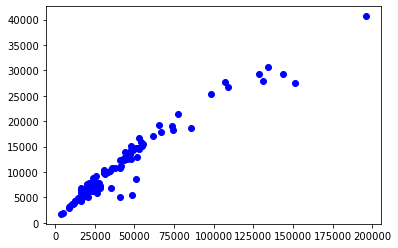

In [793]:
import matplotlib.pyplot as plt

plt.plot(stats.length, stats.unique, "bo");

Let's use the loglog version, which plots both x and y-axis logarithmically.

In this case, on the loglog plot, we see a straight line.

The fact that we see a straight line will later suggest some data modeling strategies that we might be able to use.

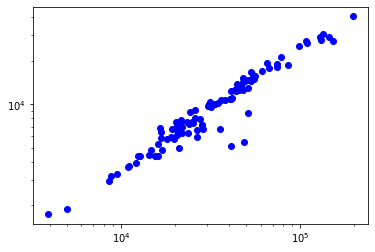

In [794]:
plt.loglog(stats.length, stats.unique, "bo");

Using pandas, we can also stratify data, for example, by language.

Let's take our stats table.

In [795]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


In [796]:
stats[stats.language == "French"]

,language,author,title,length,unique
8,French,Chevalier,L'a╠èle de sable,73801,18989
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
10,French,Chevalier,La capitaine,46306,13083
11,French,Chevalier,La fille des indiens rouges,66621,17875
12,French,Chevalier,La fille du pirate,52519,14649
13,French,Chevalier,Le chasseur noir,51341,12945
14,French,Chevalier,Les derniers Iroquois,55565,15583
15,French,De maupassant,Boule de Suif,35905,10725
16,French,De maupassant,Claire de Lune,25975,8076
17,French,De maupassant,Contes de la Becasse,34723,10210


Let's construct a plot using different colors for different languages.

Plt uses essentially the same names for colors as HTML does, the markup language used to create webpages.

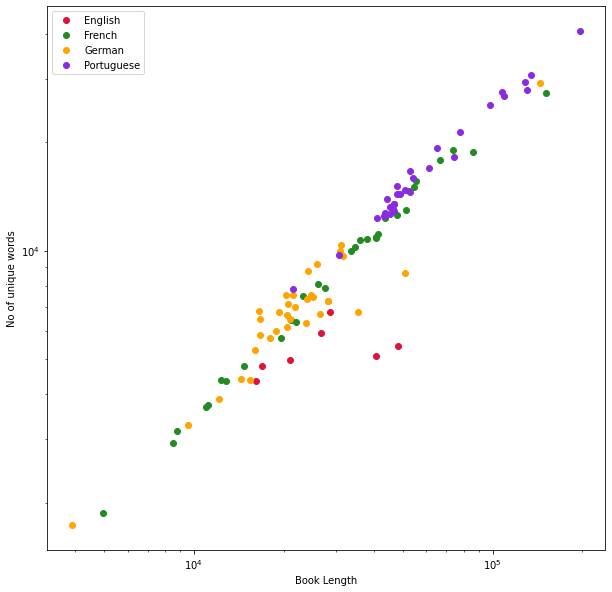

In [797]:
plt.figure(figsize=(10,10))

subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label= "English", color="crimson");

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label= "French", color="forestgreen");

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label= "German", color="orange");

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label= "Portuguese", color="blueviolet");

plt.legend()
plt.xlabel("Book Length")
plt.ylabel("No of unique words")
plt.savefig("lang_plot.pdf")

In [798]:
stats.length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [799]:
stats["length"]

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object